In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from numpy import array
from numpy import argmax;
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
%matplotlib inline
import scipy.special 
import random
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.utils import shuffle
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import torch.utils.data as data_utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
har_data = pd.read_csv("/content/drive/MyDrive/Human_Activity_Recognition_Using_Smartphones_Data.csv")

# **Exploratory Data Analysis**

In [ ]:
print(har_data.shape)
har_data.head(-5)

(10299, 562)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10289,0.305631,-0.052702,-0.155684,-0.343078,-0.151250,-0.177296,-0.383228,-0.181989,-0.287325,-0.108216,...,-0.285985,-0.714939,-0.338596,0.363565,-0.951163,-0.228412,-0.691122,0.241953,0.180141,WALKING_UPSTAIRS
10290,0.321443,-0.023799,-0.119695,-0.336548,-0.183307,-0.154297,-0.396342,-0.224409,-0.220786,-0.073510,...,-0.172403,-0.563389,-0.874477,-0.684506,-0.948809,0.472612,-0.677946,0.256877,0.177768,WALKING_UPSTAIRS
10291,0.267413,-0.021596,-0.070550,-0.323426,-0.118042,-0.323907,-0.395468,-0.129623,-0.335741,0.053516,...,-0.388926,-0.761280,0.218079,-0.690839,-0.922779,0.232523,-0.672635,0.261034,0.178609,WALKING_UPSTAIRS
10292,0.147146,-0.046908,-0.069338,-0.348686,0.018057,-0.364716,-0.437199,0.019297,-0.411240,0.053516,...,-0.552567,-0.850109,0.524082,0.041970,-0.922941,0.489178,-0.660366,0.272243,0.178547,WALKING_UPSTAIRS


In [ ]:
har_data.shape

(10299, 562)

In [ ]:
har_data.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,-0.614989,-0.466732,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,0.399034,0.538707,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,-0.979064,-0.935788,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,-0.845068,-0.874825,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,-0.288149,-0.014641,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Check for nan/null values
print('We have {} NaN/Null values in dataset'.format(har_data.isnull().values.sum()))


We have 0 NaN/Null values in dataset


In [ ]:
# Check for duplicates
print('No of duplicates in dataset: {}'.format(sum(har_data.duplicated())))

No of duplicates in dataset: 0


In [ ]:
har_data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)

# **Changing feature names**

In [ ]:
columns = har_data.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','')
columns = columns.str.replace('[-]', '')
columns = columns.str.replace('[,]','')

har_data.columns = columns

har_data.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagskewness', 'fBodyBodyGyroJerkMagkurtosis',
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'Activity'],
      dtype='object', length=562)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

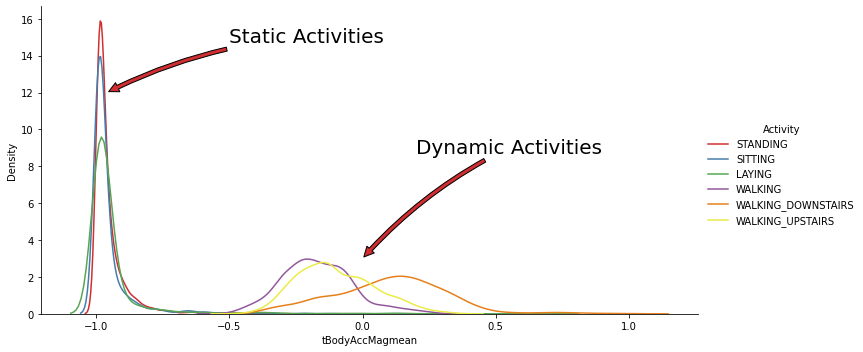

In [ ]:
# seperation of static and dynamic activities
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(har_data, hue='Activity', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Static Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Dynamic Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

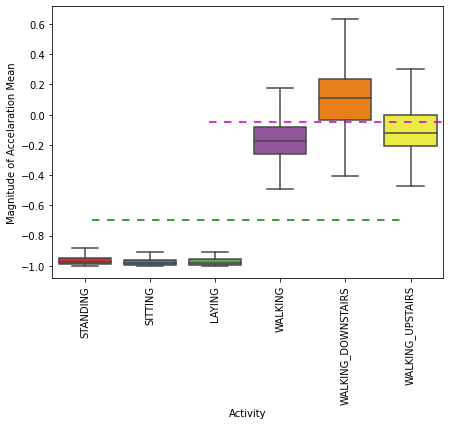

In [ ]:
#to elaborate the seperation of static and dynamic activities we will plot some plots
#1 Magnitude of accleration
plt.figure(figsize=(7,5))
sns.boxplot(x='Activity', y='tBodyAccMagmean',data=har_data, showfliers=False, saturation=1)
plt.ylabel('Magnitude of Accelaration Mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

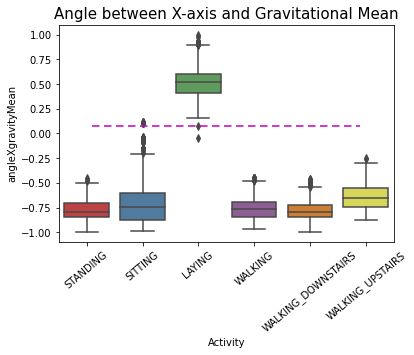

In [ ]:
#2 Position of gravitational accelaration components 
sns.boxplot(x='Activity', y='angleXgravityMean', data=har_data)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravitational Mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

### **Position of GravityAccelerationComponants also matters**

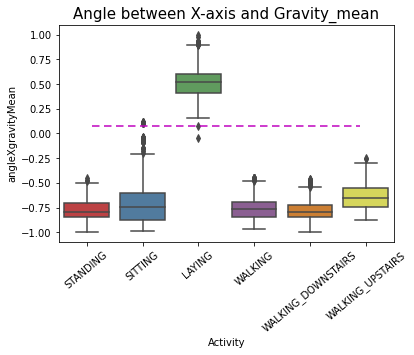

In [ ]:
sns.boxplot(x='Activity', y='angleXgravityMean', data=har_data)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

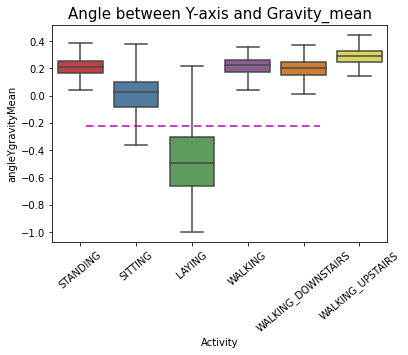

In [ ]:
sns.boxplot(x='Activity', y='angleYgravityMean', data = har_data, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

345 213 4


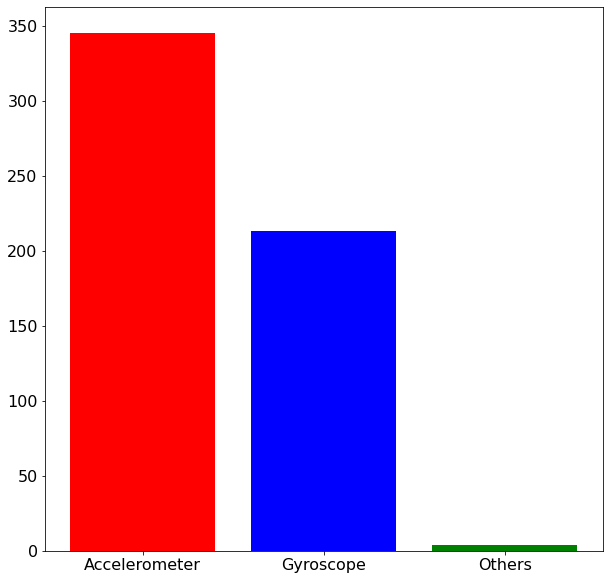

In [ ]:
# Count for each type
acc = 0
gyro = 0
others = 0
for column in har_data.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

# Show bar plot for the three types
plt.rcParams.update({'figure.figsize': [10, 10], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('r', 'b', 'g'))
print(acc , gyro, others)

### **1. Distributions of activities for each participants**

In [ ]:
har_data["Activity"].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


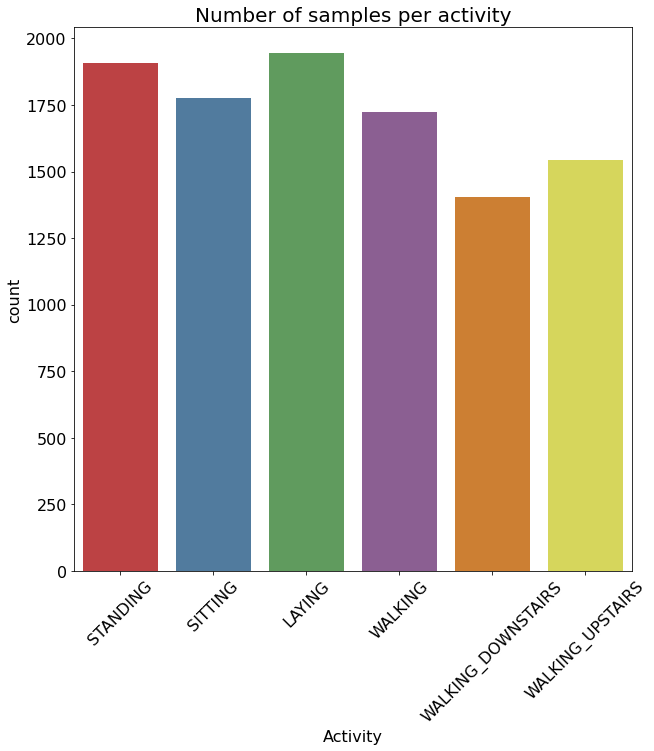

In [ ]:
plt.title('Number of samples per activity',fontsize=20)
sns.countplot(har_data.Activity)
plt.xticks(rotation=45)
plt.show()

In [ ]:
har_data.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'fBodyBodyGyroJerkMagskewness', 'fBodyBodyGyroJerkMagkurtosis',
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'Activity'],
      dtype='object', length=562)

In [ ]:
X = har_data.drop(["Activity"], axis=1)
y = har_data["Activity"]

In [ ]:
train, test = train_test_split(har_data, test_size=0.21, random_state=1, stratify=y)

In [ ]:
print(len(train),len(test))

8136 2163


In [ ]:
activities = {"STANDING": 0., "SITTING":1., "LAYING": 2., "WALKING": 3., "WALKİNG_DOWNSTAIRS": 4., "WALKING_UPSTAIRS": 5.}

In [ ]:
train.replace("STANDING", 0., inplace = True)
train.replace("SITTING", 1., inplace = True)
train.replace("LAYING", 2., inplace = True)
train.replace("WALKING", 3., inplace = True)
train.replace("WALKING_DOWNSTAIRS", 4., inplace = True)
train.replace("WALKING_UPSTAIRS", 5., inplace = True)
test.replace("STANDING", 0., inplace = True)
test.replace("SITTING", 1., inplace = True)
test.replace("LAYING", 2., inplace = True)
test.replace("WALKING", 3., inplace = True)
test.replace("WALKING_DOWNSTAIRS", 4., inplace = True)
test.replace("WALKING_UPSTAIRS", 5., inplace = True)

In [ ]:
train_features = train.drop(["Activity"], axis=1).values
train_targets = train["Activity"].values
test_features = test.drop(["Activity"], axis = 1).values
test_targets = test["Activity"].values

In [ ]:
torch.Tensor(train_features)

tensor([[ 0.2360,  0.0056, -0.0974,  ..., -0.6679,  0.2652,  0.1788],
        [ 0.2787, -0.0174, -0.1031,  ..., -0.8840,  0.1138,  0.1012],
        [ 0.2517, -0.0191, -0.1042,  ...,  0.4068, -0.3278, -0.6607],
        ...,
        [ 0.2811, -0.0178, -0.1192,  ..., -0.6572, -0.0644, -0.1623],
        [ 0.2808, -0.0109, -0.1042,  ..., -0.8211,  0.1464,  0.1372],
        [ 0.3068, -0.0267, -0.0990,  ...,  0.5905, -0.5328, -0.4731]])

In [ ]:
train_set = data_utils.TensorDataset(torch.Tensor(train_features.astype(np.float32)), torch.Tensor(train_targets.astype(np.float32)))
train_loader = data_utils.DataLoader(train_set, batch_size=72)
test_set = data_utils.TensorDataset(torch.Tensor(test_features.astype(np.float32)), torch.Tensor(test_targets.astype(np.float32)))
test_loader = data_utils.DataLoader(test_set, batch_size=103)

In [ ]:
print(len(train_loader),len(test_loader))

113 21


In [ ]:
for (X_train,y_train) in train_loader:
  print("X_train:", X_train.size(), "type", X_train.type())
  print('y_train:', y_train.size(), 'type:', y_train.type())
  break
for (X_test,y_test) in test_loader:
  print("X_test:", X_test.size(), "type", X_test.type())
  print('y_test:', y_test.size(), 'type:', y_test.type())
  break

X_train: torch.Size([72, 561]) type torch.FloatTensor
y_train: torch.Size([72]) type: torch.FloatTensor
X_test: torch.Size([103, 561]) type torch.FloatTensor
y_test: torch.Size([103]) type: torch.FloatTensor


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


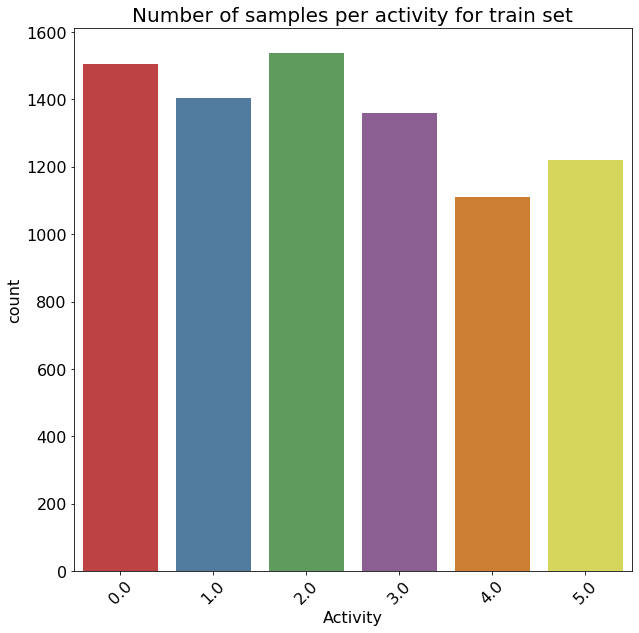

In [ ]:
plt.title('Number of samples per activity for train set',fontsize=20)
sns.countplot(train.Activity)
plt.xticks(rotation=45)
plt.show()

In [ ]:
test["Activity"].value_counts()

2.0    408
0.0    401
1.0    373
3.0    362
5.0    324
4.0    295
Name: Activity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


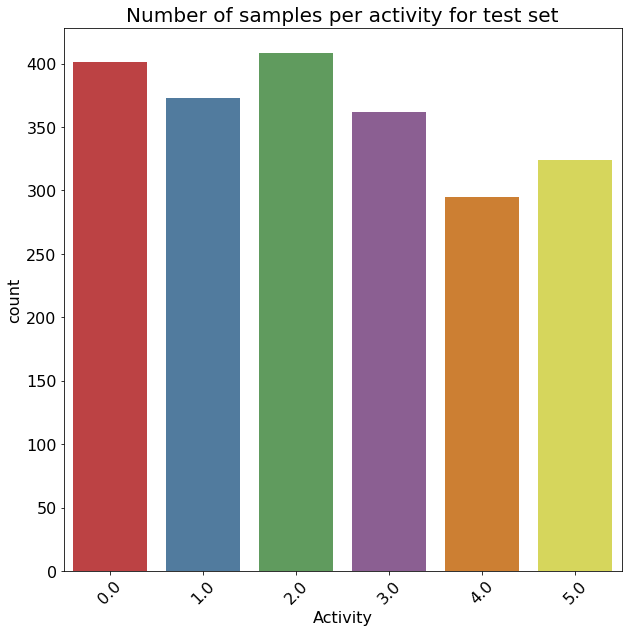

In [ ]:
plt.title('Number of samples per activity for test set',fontsize=20)
sns.countplot(test.Activity)
plt.xticks(rotation=45)
plt.show()

## **Modelling**

In [ ]:
# hyperparameters
input_size = 561
hidden_size_1 = 100
hidden_size_2 = 50
num_classes = 6

epochs = 20

learning_rate = 0.001

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
    super().__init__()

    self.l1 = nn.Linear(input_size,hidden_size_1)
    self.l2 = nn.Linear(hidden_size_1, hidden_size_2)
    self.l3 = nn.Linear(hidden_size_2, output_size)

  def forward(self,X):
    X = torch.sigmoid(self.l1(X))
    X = torch.sigmoid(self.l2(X))
    X = self.l3(X)
    return X
  

In [ ]:
model = Model(input_size, hidden_size_1, hidden_size_2, num_classes)

In [ ]:
#loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr= learning_rate)

print(model)

Model(
  (l1): Linear(in_features=561, out_features=100, bias=True)
  (l2): Linear(in_features=100, out_features=50, bias=True)
  (l3): Linear(in_features=50, out_features=6, bias=True)
)


In [ ]:
# training
train_losses = []
test_losses = []
train_correct = []
test_correct= []


for i in range(epochs):
  train_corr = 0
  test_corr = 0
  total_loss= 0

  for step,(X_train, y_train) in enumerate(train_loader):
    step += 1

    # Apply the model 
    y_train = torch.nn.functional.one_hot(y_train.type(torch.LongTensor), num_classes= 6)
    y_train = torch.tensor(y_train, dtype= float)
    y_pred = model(X_train.view(72,-1))
    
    loss = criterion(y_pred, y_train)
    total_loss += loss

    # Calculate the number of correct predictions
    predicted = torch.max(y_pred.data, 1)[1]
    batch_corr = (predicted==torch.max(y_train.data, 1)[1]).sum()
  
    train_corr += batch_corr

    # Update parameters
    optimizer.zero_grad() # reset the gradients after each training step
    loss.backward() # to trigger backprop
    optimizer.step() # perform parameter update

    # Print interim results

    if step%113 == 0:
      print(f"epoch: {i+1} Train loss: {total_loss.item()/113} Train accuracy: {train_corr.item()/8136}")
    
    
    
  # Update train loss & accuracy for the epoch
  train_losses.append(total_loss/113)
  train_correct.append(train_corr) 

  # Run the testing batches
  total_loss= 0
  predictions= []
  true_labels= []
  with torch.no_grad(): # don't calculate gradients during testing
    for step, (X_test, y_test) in enumerate(test_loader):
      step += 1
    
      # Apply the model
      y_test = torch.nn.functional.one_hot(y_test.type(torch.LongTensor), num_classes= 6)
      y_test = torch.tensor(y_test, dtype= float)
      y_val = model(X_test.view(103,-1))

      predicted = torch.max(y_val.data,1)[1]
      test_corr += (predicted == torch.max(y_test.data, 1)[1]).sum()

      predictions.append(predicted)
      true_labels.append(y_test)

      # Update test loss & accuracy for the epoch 
      loss = criterion(y_val, y_test)
      total_loss += loss

      if step%21 == 0:
        print(f"epoch: {i+1} Test loss: {total_loss.item()/33} Test accuracy: {test_corr.item()/2163}")

    test_losses.append(total_loss/21)
    test_correct.append(test_corr)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 1 Train loss: 1.39040542384399 Train accuracy: 0.37057522123893805
epoch: 1 Test loss: 0.7102871861798724 Test accuracy: 0.5760517799352751


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:56: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


epoch: 2 Train loss: 0.9454166057282429 Train accuracy: 0.6896509341199607
epoch: 2 Test loss: 0.46487823953766017 Test accuracy: 0.710124826629681
epoch: 3 Train loss: 0.5703764453149357 Train accuracy: 0.8250983284169124
epoch: 3 Test loss: 0.282876106784094 Test accuracy: 0.8585298196948682
epoch: 4 Train loss: 0.3534511073287339 Train accuracy: 0.9020403146509341
epoch: 4 Test loss: 0.18544458907517344 Test accuracy: 0.9186315302820157
epoch: 5 Train loss: 0.238227682790033 Train accuracy: 0.9303097345132744
epoch: 5 Test loss: 0.12736228724355803 Test accuracy: 0.9398982894128525
epoch: 6 Train loss: 0.1753593011749607 Train accuracy: 0.9449360865290068
epoch: 6 Test loss: 0.09787645236958636 Test accuracy: 0.9496070272769301
epoch: 7 Train loss: 0.13777979963867507 Train accuracy: 0.9553834808259587
epoch: 7 Test loss: 0.08122769678485556 Test accuracy: 0.9560795191863153
epoch: 8 Train loss: 0.11447650244603277 Train accuracy: 0.9616519174041298
epoch: 8 Test loss: 0.07146569457

In [ ]:
# Test accuracy
print(f"Test accuracy: {test_correct[-1].item()*100/2163}%")

Test accuracy: 97.17984281091077%


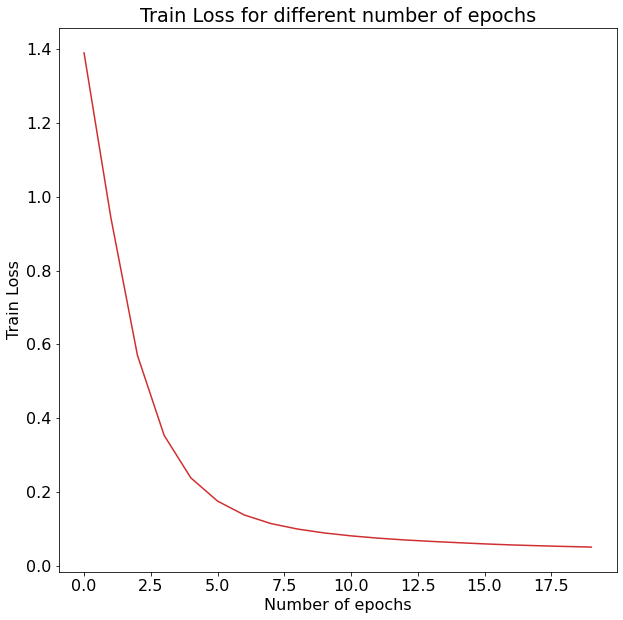

In [ ]:
with torch.no_grad():
  plt.plot(train_losses)
  plt.title("Train Loss for different number of epochs")
  plt.xlabel("Number of epochs")
  plt.ylabel("Train Loss")

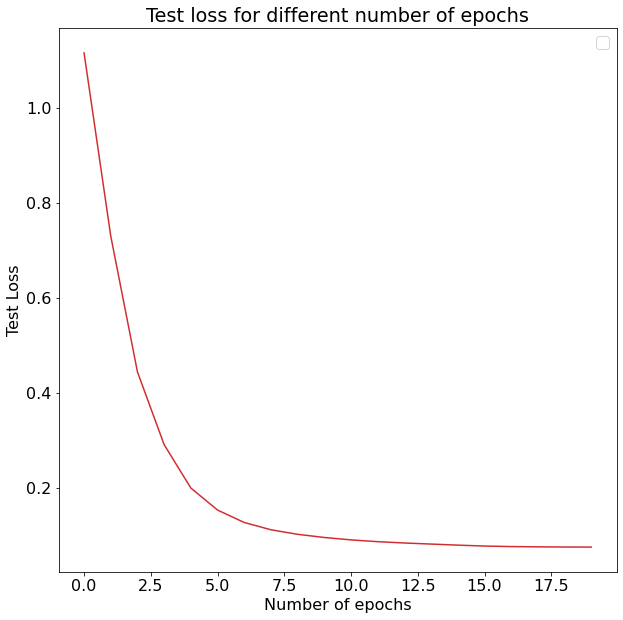

In [ ]:
with torch.no_grad():
  plt.plot(test_losses)
  plt.title("Test loss for different number of epochs")
  plt.xlabel("Number of epochs")
  plt.ylabel("Test Loss")
  plt.legend()

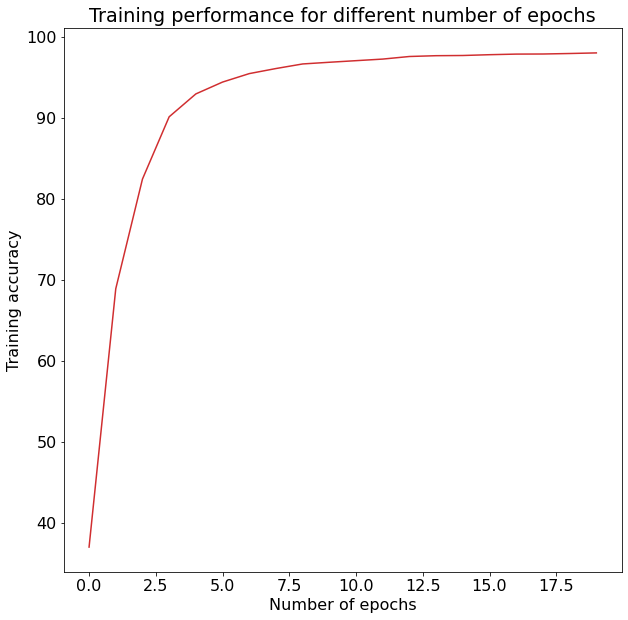

In [ ]:
with torch.no_grad():
  plt.plot([t/8136*100 for t in train_correct])
  plt.title("Training performance for different number of epochs")
  plt.xlabel("Number of epochs")
  plt.ylabel("Training accuracy")

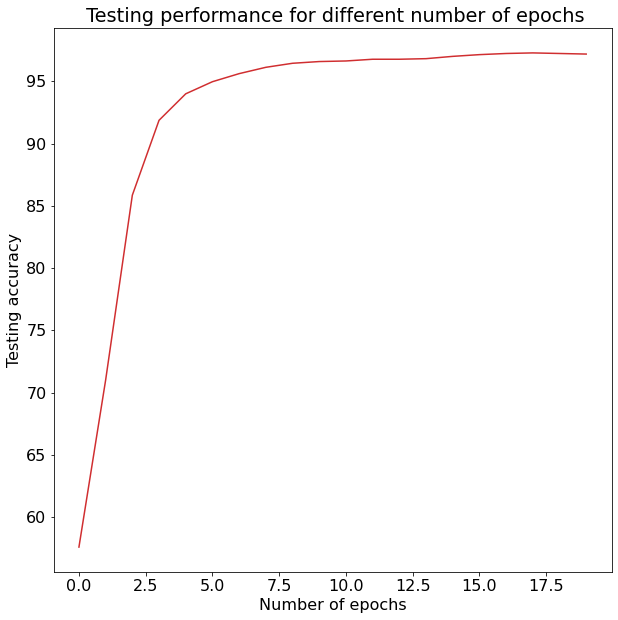

In [ ]:
with torch.no_grad():
  plt.plot([t/2163*100 for t in test_correct])
  plt.title(" Testing performance for different number of epochs")
  plt.xlabel("Number of epochs")
  plt.ylabel("Testing accuracy")

In [ ]:
len(predictions)  # predictions list has 21 batch, every batch has 103 sample

21

In [ ]:
prediction_list= []
for i in predictions:
  for j in i:
    prediction_list.append(j.item())

In [ ]:
label_list= []
for i in true_labels:
  for j in i:
    label_list.append(np.argmax(j).item())

In [ ]:
print(confusion_matrix(label_list, prediction_list))
print("Precision score:", precision_score(label_list, prediction_list,  average="micro"))
print("Recall score:", recall_score(label_list, prediction_list, average="micro"))
print("F1_score:", f1_score(label_list, prediction_list,average="micro"))

[[389  12   0   0   0   0]
 [ 42 330   1   0   0   0]
 [  0   0 408   0   0   0]
 [  0   0   0 359   1   2]
 [  0   0   0   1 293   1]
 [  0   0   0   1   0 323]]
Precision score: 0.9717984281091078
Recall score: 0.9717984281091078
F1_score: 0.9717984281091078
